# Homework 7 - Curve Fitting - Jason Pruitt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, Parameters
import lmfit
import pandas as pd


### Part 1 - Curve Fitting
For the first part we are tasked with fitting both polynomial and sine functions to the data in curve_data.txt

In [2]:
df0 = pd.read_csv('curve_data.txt', sep = '\t')
x = df0['x']
y = df0['y']
dy = df0['dy']
df0

,x,y,dy
0,0.0000,1.5826,0.3
1,1.2857,6.9361,0.3
2,2.5714,4.8991,0.3
3,3.8571,-1.5914,0.3
4,5.1429,-2.5532,0.3
5,6.4286,2.8287,0.3
6,7.7143,7.1324,0.3
7,9.0000,4.1764,0.3


We employ the same polynomial fit from the lmfitdemo.py, where we create a Model object that takes in the handle of our polynomial function, altering the order of the polynomial until we reached an acceptable reduced-$\chi^2$ value. 

In [3]:
def poly(x, **params):
    """
    Polynomial fitting function that takes in a parameter dictionatry which are the polynomial coefficients
    :param x: independent variable
    :param params: keywork argument - dictionary of the form ({'c00': c0, 'c01': c1, etc})
    :return: polynomial function of arbitrary order
    """
    temp= 0.0
    parnames = sorted(params.keys())
    for i, pname in enumerate(parnames):
        temp += params[pname]*x**i
    return temp

c = np.ones(len(x)-3) 

# Polynomial fit using poly function
polyModel = Model(poly)

# Parameter names and starting values
polyParams = Parameters()
for j in range(len(c)):
    polyParams.add('C{0:g}'.format(j), value=c[j])
polyResult = polyModel.fit(y, polyParams, x=x)

# polyResult.plot()
# plt.show()

# plt.figure()
# plt.errorbar(x, y, yerr = dy, fmt = 'k.')
# plt.plot(x, polyResult.best_fit)
# plt.show()

print(polyResult.chisqr)
print(polyResult.redchi)

3.113932585466558
1.0379775284888526


To fit a sine function to our data, we used lmfit.models.ExpressionModel to pass in a string of our expression. This function built a model similarly to the polynomial fit, but instead only needing the string rather than the python function detailing the inputs. The ExpressionModel object has a method make_params() that allow for parameter creation based off of the string passed into the model's creation. 

In [4]:
sineModel = lmfit.models.ExpressionModel("C + A*sin(x)")
params = sineModel.make_params(C=1, A=1)

sineResult = sineModel.fit(y, params, x=x)
# sineResult.plot()
# plt.show()

print(sineResult.chisqr)
print(sineResult.redchi)

0.2437957554412642
0.040632625906877363


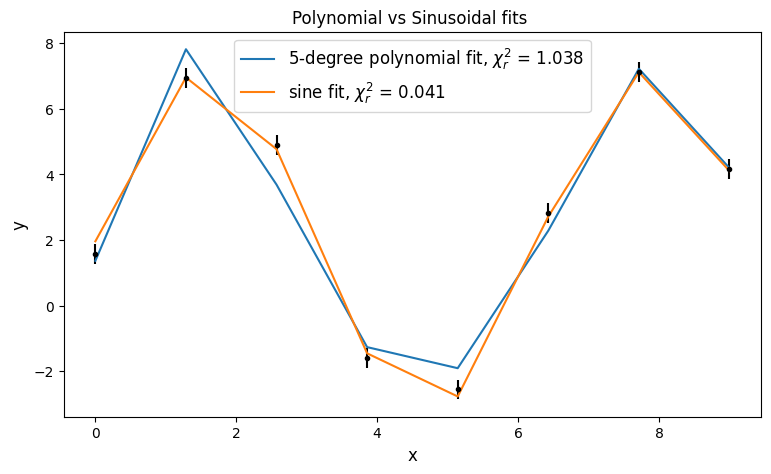

In [5]:
plt.figure(figsize = (9, 5))
plt.errorbar(x, y, yerr = dy, fmt = 'k.')
plt.plot(x, polyResult.best_fit, label = f'{len(c)}-degree polynomial fit, $\chi^2_r$ = {polyResult.redchi:.3f}')
plt.plot(x, sineResult.best_fit, label = f'sine fit, $\chi^2_r$ = {sineResult.redchi:.3f}')
plt.legend(loc = 'best', fontsize = 12)
plt.title('Polynomial vs Sinusoidal fits ')
plt.xlabel('x', fontsize = 12)
plt.ylabel('y', fontsize = 12)
plt.show()

##### To conclude part 1:
We note that while it is possible to get a lower reduced $\chi^2$ value for the polynomial fit by increasing the order of the polynomial, the sine fit only needed two free parameters ($N_{param}$ = 2) to achieve an acceptable fit, whereas the polynomial needed 5+. This means that in order to achieve a better fit, the polynomial fit would decrease the number of degrees of freedom (as $N_{dof} = N_{data} - N_{param}$) for $N_{data} = 8$. 

### Part 2 - Dow-Jones Averages and the Stock Market Crash
We were tasked to fit polynomals from order 1 to 4 to the Dow-Jones averages over a five day period.

In [6]:
day = np.arange(1, 6, 1) # length five because non-inclusive
dja = np.array([2470, 2510, 2410, 2350, 2240])

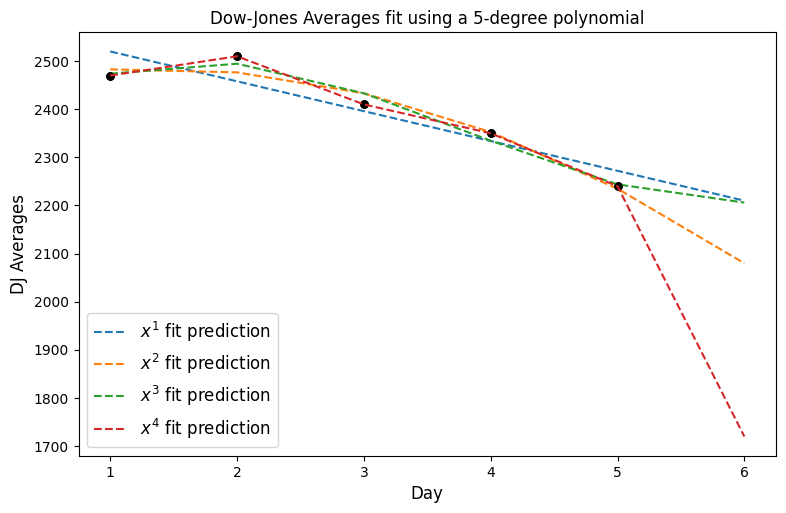

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (9, 5.5))

for deg in np.arange(2, 6, 1): # fit up to a quartic
    c2 = np.ones(deg)

    # Polynomial fit using poly function
    dowModel = Model(poly)

    # Parameter names and starting values
    dowParams = Parameters()
    for j in range(len(c2)):
        dowParams.add('C{0:g}'.format(j), value=c2[j])
    dowResult = dowModel.fit(dja, dowParams, x=day)

    # Evaluate the model at a different interval
    afterDays = np.arange(1, 7, 1)
    extrap = dowResult.eval(x = afterDays)

    # plt.figure()
    axs.set_title(f'Dow-Jones Averages fit using a {deg}-degree polynomial', fontsize = 12)
    axs.plot(day, dja, 'k.', markersize = 10)
    axs.plot(afterDays, extrap, '--', label = f'$x^{deg-1}$ fit prediction')
#     axs.plot(day, dowResult.best_fit, label = f'$x^{deg-1}$ fit of given data')
    axs.legend(fontsize = 12)
    axs.set_xlabel('Day', fontsize = 12)
    axs.set_ylabel('D-J Averages', fontsize = 12)

plt.show()

#### To conclude part 2:
We note that the quartic fit accurately predicts the stock market crash, yet no other parts of the function exhibit such a harsh downward trend. This is most likely happenstance. This displays a key limitation of curve-fitting, especially with polynomials. The curve used to fit the data might contain or exhibit behavior that does not exist in the data. For a highly volatile and sporadic system such as the stock market, it is most likely disingenuous to use extrapolation from a polynomial fit to conclude anything meaningful. 

### Problem 5 - Vandermonde matrix
For this problem, we were tasked to plot the error of an algorithm that computed the inverse of a Vandermonde matrix.
A Vandermonde matrix is defined as 

\begin{equation}
V = 
\begin{bmatrix}
1 & x_1 & x_1^2 & ... & x_1^{N-1}\\
1 & x_1 & x_1^2 & ... & x_1^{N-1}\\
\vdots	 & \vdots & \ddots & \vdots	&\\
1 & x_N & x_N^2 & ... & x_N^{N-1}\\
\end{bmatrix}
\end{equation}

Furthermore, our error is defined as

\begin{equation}
E = max{|D_{ij}|}
\end{equation}

where

\begin{equation}
D \equiv VV^{-1} - I
\end{equation}

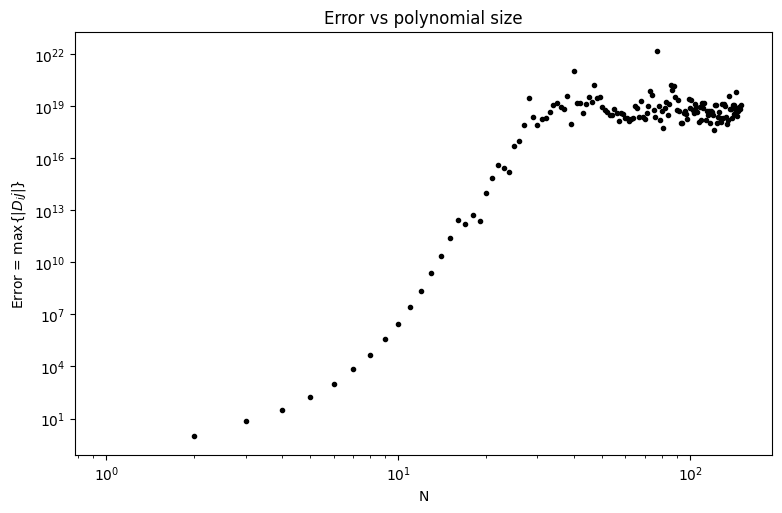

In [8]:
def problem5(N):

    # construct vandermonde matrix 
    
    # evenly spaced data
    x = np.arange(1, N + 1)
    
    vander = np.array([[xi**i for i in range(N)] for xi in x])
#     print(f'vandermonde matrix: \t\t{vander}\n')
    
    # take the inverse of the vandermonde matrix
    vanderInv = np.linalg.inv(vander)
    
    # Identity matrix the size of the vandermonde matrix
    I = np.eye(len(vander))
    D = vander*vanderInv - I
    
    err = np.max(abs(D))
    
    return(err)

nvals = np.arange(1, 150, 1)

evals = [problem5(n) for n in nvals]

plt.figure(figsize = (9, 5.5))
plt.loglog(nvals, evals, 'k.')
plt.title('Error vs polynomial size')
plt.ylabel('Error = max{|$D_ij$|}')
plt.xlabel('N')
plt.show()

This plot confirms the claim that the Vandermonde matrix is very ill-conditioned, and its error grows very quickly with N. This can otherwise be stated that the numerical errors in calculating the Vandermonde's matrix inverse become increasingly large as the matrix size grows. 

#### To conclude:
This assignment allowed us to explore the implementations and limitations of curve-fitting. The lmfit package was particularly useful, and also interesting in that it wraps and extends many functions from scipy_optimize. Most notably, lmfit returns goodness of fit metrics so that one can judge whether or not their fit routine is properly implemented. As for the Vandermonde matrix, while the error grows quite quickly as the matrix and polynomial order grow, we note that polynomial fitting becomes much more prone to overfitting at higher orders. 